Epoch 1/30
469/469 - 66s - loss: 0.1812 - accuracy: 0.9477 - val_loss: 0.0526 - val_accuracy: 0.9830 - 66s/epoch - 141ms/step
Epoch 2/30
469/469 - 66s - loss: 0.0514 - accuracy: 0.9843 - val_loss: 0.0310 - val_accuracy: 0.9898 - 66s/epoch - 140ms/step
Epoch 3/30
469/469 - 70s - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0321 - val_accuracy: 0.9883 - 70s/epoch - 150ms/step
Epoch 4/30
469/469 - 60s - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.0296 - val_accuracy: 0.9903 - 60s/epoch - 128ms/step
Epoch 5/30
469/469 - 59s - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0242 - val_accuracy: 0.9917 - 59s/epoch - 126ms/step
Epoch 6/30
469/469 - 60s - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0394 - val_accuracy: 0.9877 - 60s/epoch - 127ms/step
Epoch 7/30
469/469 - 75s - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.0305 - val_accuracy: 0.9904 - 75s/epoch - 161ms/step
Epoch 8/30
469/469 - 62s - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0274 - val_accuracy: 0.9917 - 62s/epoch - 132

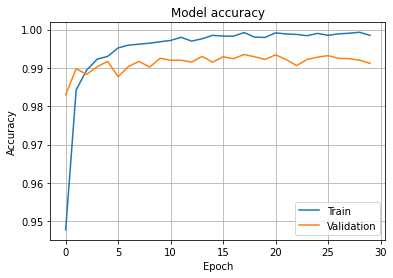

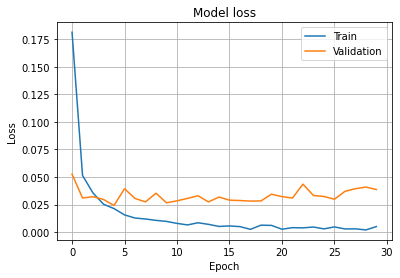

In [ ]:
#6-1
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res = cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()


Epoch 1/12
469/469 - 56s - loss: 0.3090 - accuracy: 0.9039 - val_loss: 0.0649 - val_accuracy: 0.9796 - 56s/epoch - 118ms/step
Epoch 2/12
469/469 - 54s - loss: 0.1039 - accuracy: 0.9691 - val_loss: 0.0411 - val_accuracy: 0.9871 - 54s/epoch - 116ms/step
Epoch 3/12
469/469 - 57s - loss: 0.0781 - accuracy: 0.9762 - val_loss: 0.0339 - val_accuracy: 0.9897 - 57s/epoch - 121ms/step
Epoch 4/12
469/469 - 48s - loss: 0.0629 - accuracy: 0.9811 - val_loss: 0.0281 - val_accuracy: 0.9902 - 48s/epoch - 102ms/step
Epoch 5/12
469/469 - 51s - loss: 0.0546 - accuracy: 0.9840 - val_loss: 0.0278 - val_accuracy: 0.9904 - 51s/epoch - 109ms/step
Epoch 6/12
469/469 - 45s - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0280 - val_accuracy: 0.9904 - 45s/epoch - 96ms/step
Epoch 7/12
469/469 - 43s - loss: 0.0439 - accuracy: 0.9868 - val_loss: 0.0254 - val_accuracy: 0.9914 - 43s/epoch - 92ms/step
Epoch 8/12
469/469 - 44s - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0242 - val_accuracy: 0.9921 - 44s/epoch - 93ms/

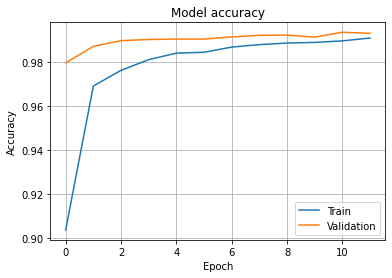

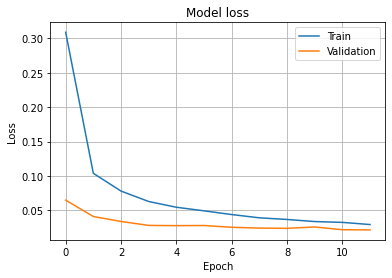

In [ ]:
#6-2
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))


cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

res = cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/12
469/469 - 62s - loss: 0.6531 - accuracy: 0.7621 - val_loss: 0.4311 - val_accuracy: 0.8475 - 62s/epoch - 132ms/step
Epoch 2/12
469/469 - 52s - loss: 0.4327 - accuracy: 0.8461 - val_loss: 0.3582 - val_accuracy: 0.8717 - 52s/epoch - 110ms/step
Epoch 3/12
469/469 - 54s - loss: 0.3813 - accuracy: 0.8621 - val_loss: 0.3392 - val_accuracy: 0.8778 - 54s/epoch - 115ms/step
Epoch 4/12
469/469 - 58s - loss: 0.3533 - accuracy: 0.8716 - val_loss: 0.3094 - val_accuracy: 0.8874 - 58s/epoch - 124ms/step
Epoch 5/12
469/469 - 51s - loss: 0.3278 - accuracy: 0.8819 - val_loss: 0.2997 - val_accuracy: 0.8914 - 51s/epoch - 109ms/step
Epoch 6/12
469/469 - 47s - loss: 0.3090 - accuracy: 0.8886 - val_loss: 0.2839 - val_accuracy: 0.8936 - 47s/epoch - 99ms/step
Epoch 7/12
469/469 - 57s - loss: 0.2939 - accuracy: 0.8927 - val_loss: 0.2728 - val_accuracy: 0.9013 - 57s/epoch - 123ms/step
Epoch 8/12
469/469 - 51s - loss: 0.2816 - accuracy: 0.89

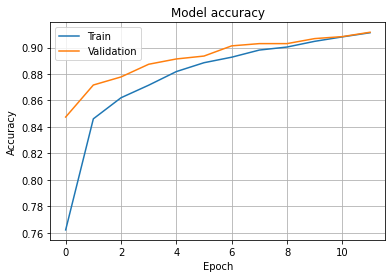

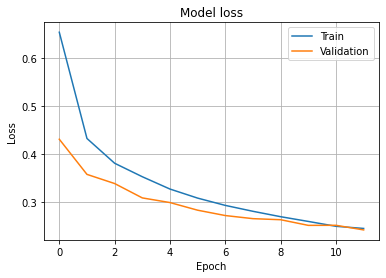

In [ ]:
#6-3
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))


cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

res = cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

170508288/170498071 [==============================] - 2s 0us/step
Epoch 1/30
391/391 - 181s - loss: 1.6178 - accuracy: 0.4065 - val_loss: 1.3098 - val_accuracy: 0.5292 - 181s/epoch - 463ms/step
Epoch 2/30
391/391 - 180s - loss: 1.2300 - accuracy: 0.5592 - val_loss: 1.0659 - val_accuracy: 0.6191 - 180s/epoch - 460ms/step
Epoch 3/30
391/391 - 170s - loss: 1.0480 - accuracy: 0.6310 - val_loss: 0.9296 - val_accuracy: 0.6769 - 170s/epoch - 435ms/step
Epoch 4/30
391/391 - 184s - loss: 0.9217 - accuracy: 0.6764 - val_loss: 0.8263 - val_accuracy: 0.7162 - 184s/epoch - 471ms/step
Epoch 5/30
391/391 - 162s - loss: 0.8386 - accuracy: 0.7053 - val_loss: 0.7934 - val_accuracy: 0.7198 - 162s/epoch - 414ms/step
Epoch 6/30
391/391 - 170s - loss: 0.7677 - accuracy: 0.7299 - val_loss: 0.7558 - val_accuracy: 0.7414 - 170s/epoch - 434ms/step
Epoch 7/30
391/391 - 183s - loss: 0.7135 - accuracy: 0.7496 - val_loss: 0.7711 - val_accuracy: 0.7338 - 183s/epoch - 468ms/step
Epoch 8/30
391/391 - 169s - loss: 0.6

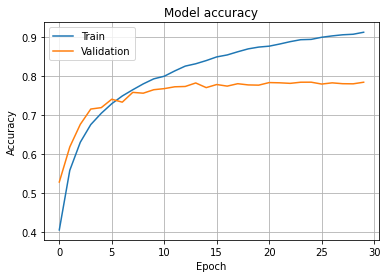

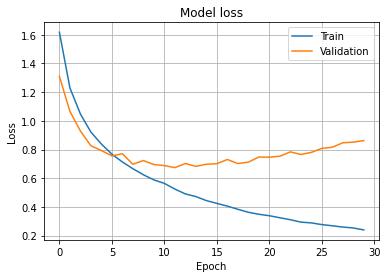

In [ ]:
#6-4
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))₩
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))


cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res = cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

In [2]:
cnn.save("my_cnn.h5")

In [3]:
#6-5
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

cnn=tf.keras.models.load_model("my_cnn.h5")
cnn.summary()

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

res = cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        